# Digital encoding

This notebook introduces tools for handling binary strings and encoding these binary strings into the computational basis of a quantum register.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
import qiskit_tools as qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Let us first consider writing a decimal value into binary. Lets make it a particularly difficult value to store such as pi:

In [2]:
in_digit = np.pi
print(in_digit)

3.141592653589793


We can assume a number of bits to write this to:

In [3]:
n = 20

Given the number, we can determine the number of bits to assign to storing the integer part of the fraction:

In [4]:
nint = qt.get_nint(in_digit)
print(nint)

2


We can determine the binary string that most closesly approximates the value given using the set number of bits:

In [5]:
in_binary = qt.my_binary_repr(in_digit, n, nint=nint, phase=False)
print(in_binary)

11001001000011111110


Let us convert this back to a decimal format:

In [6]:
out_digit = qt.bin_to_dec(in_binary, nint=nint, phase=False)
print(out_digit)

3.1415939331054688


Given the finite number of bits, the binary string has a finite precision. When we do not consider negative numbers, the number of bits reserved for storing the precision is equal to the total number of bits minus the number of integer bits:

In [7]:
n-nint

18

Now let us consider a negative number:

In [8]:
in_digit = -3.25
print(in_digit)

-3.25


This requires integer bits of number:

In [9]:
nint = qt.get_nint(in_digit)
print(nint)

2


We can also work out the required precision bits to fully express the decimal:

In [10]:
npres = qt.get_npres(in_digit)
print(npres)

2


The total number of bits when considering negative numbers is the number of integer bits plus the number of precision bits plus an additional bit to store the sign of the digit:

In [11]:
n = npres + nint + 1

To handle negative numbers, assign `phase=True` when determining the binary representation:

In [12]:
in_binary = qt.my_binary_repr(in_digit, n, nint=nint, phase=True)
print(in_binary)

10011


The binary string is returned in [twos-complement representation](https://en.wikipedia.org/wiki/Two%27s_complement), where the leading-order bit represents to sign (0 is positive and 1 is negative), and the integer/precision qubits are related to the magnitude representation by a bit flip and increment of the final bit by 1.

Converting back gives us our initial digit:

In [13]:
out_digit = qt.bin_to_dec(in_binary, nint=nint, phase=True)
print(out_digit)

-3.25


We can also use the [sign-magnitude representation](https://en.wikipedia.org/wiki/Signed_number_representations) where the first bit is reserved for the phase and the remaining bits store the magnitude:

In [14]:
sm_binary = qt.my_binary_repr(in_digit, n, nint=nint, phase=True, signmag=True)
print(sm_binary, qt.bin_to_dec(sm_binary, nint=nint, phase=True, signmag=True))

11101 -3.25


Let us now initiate a qiskit quantum register of $n$ bits:

In [15]:
qreg = QuantumRegister(n, 'bit')
circ = QuantumCircuit(qreg)

We can input a binary string into a quantum register using the command:

In [16]:
circ = qt.input_bits_to_qubits(in_binary, circ, qreg)

This corresponds to $X$ gates on bits corresponding to bits equal to 1:

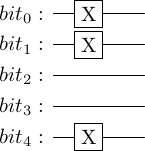

In [17]:
circ.draw(output="latex")

Note however that qiskit reverses the order of the bit strings! This is important when using measurements to read values out.